In [ ]:
import pandas as pd
import xarray as xr
import json

# โหลดข้อมูล NetCDF
ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')

# เลือกข้อมูลอุณหภูมิและช่วงเวลา
year = 2001
temp = ds.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

# คำนวณค่าเฉลี่ยอุณหภูมิต่อกริด
data_avg = temp['tmp'].mean(dim='time')

# สร้าง DataFrame จากข้อมูล NetCDF
lon, lat = data_avg.lon.values, data_avg.lat.values
temp_values = data_avg.values
#print(temp_values)

# ฟังก์ชันสำหรับสร้าง Polygon จากพิกัดกลางของกริด
def create_grid_polygon(lon_center, lat_center, lon_step, lat_step):
    return [
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างซ้าย
        [float(lon_center + lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างขวา
        [float(lon_center + lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนขวา
        [float(lon_center - lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนซ้าย
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)]   # ปิดกรอบ
    ]

# คำนวณระยะห่างระหว่างพิกัด (step)
lon_step = float(lon[1] - lon[0])
lat_step = float(lat[1] - lat[0])


# เตรียมข้อมูลในรูปแบบ JSON
features = []
for i, lon_value in enumerate(lon):
    for j, lat_value in enumerate(lat):
        temperature = temp_values[j, i]
        if not pd.isnull(temperature):  # ตรวจสอบว่าไม่มี NaN
            grid_polygon = create_grid_polygon(lon_value, lat_value, lon_step, lat_step)
            features.append({
                "type": "Feature",
                "geometry": {
                    "type": "Polygon",
                    "coordinates": [grid_polygon]
                },
                "properties": {
                    "temperature": float(temperature)  # แปลง float32 เป็น float
                }
            })
            print(grid_polygon)

# สร้างโครงสร้าง GeoJSON
geojson_data = {
    "type": "FeatureCollection",
    "features": features
}

# บันทึกข้อมูลเป็นไฟล์ GeoJSON
output_file = "../Geo-data/nc_to_json_2001.json"
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(geojson_data, f, ensure_ascii=False, indent=4)

print(f"ข้อมูลถูกบันทึกในไฟล์ {output_file}")


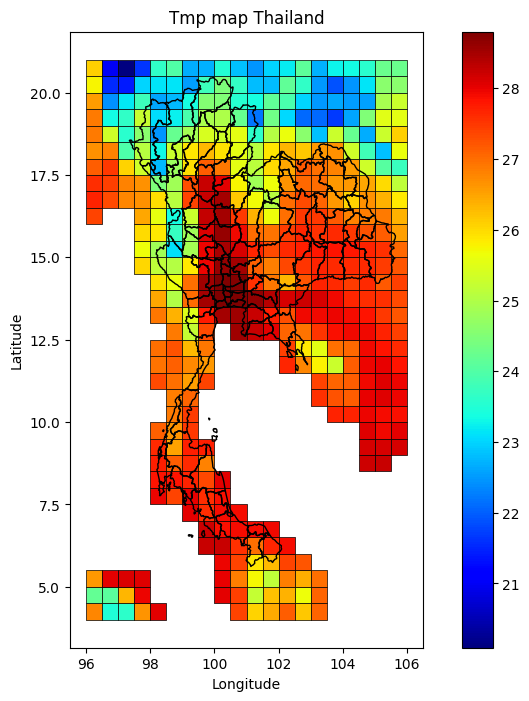

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# โหลดข้อมูล GeoJSON
data = gpd.read_file('../Geo-data/nc_to_json_2001.json')
shapefile = gpd.read_file('../Geo-data/thailand-Geo.json')

# สร้าง plot
fig, ax = plt.subplots(figsize=(10, 8))

# แสดงผลข้อมูลพื้นที่ด้วย GeoPandas
data.plot(column='temperature', cmap='jet', linewidth=0.5, ax=ax, edgecolor='black', legend=True)

shapefile.geometry.boundary.plot(ax=ax, color='black', linewidth=1)

# ปรับแต่งการแสดงผลเพิ่มเติม
plt.title('Tmp map Thailand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [18]:
import xarray as xr
import pandas as pd

# โหลดข้อมูล NetCDF
ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')

# เลือกข้อมูลอุณหภูมิและช่วงเวลา
year = 2001
temp = ds.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

# ดูข้อมูลในมิติ time ว่ามีวันหรือเดือนอะไรบ้าง
time_values = temp['time'].values
#print(time_values)
time_dates = pd.to_datetime(time_values)

print(time_dates)


DatetimeIndex(['2001-01-16', '2001-02-15', '2001-03-16', '2001-04-16',
               '2001-05-16', '2001-06-16', '2001-07-16', '2001-08-16',
               '2001-09-16', '2001-10-16', '2001-11-16', '2001-12-16'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
import xarray as xr
import pandas as pd

# โหลดข้อมูล NetCDF
ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')

# เลือกข้อมูลอุณหภูมิและช่วงเวลาในปี 2001
year = 2001
temp = ds.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

# แปลงมิติ time เป็นวันที่ที่เข้าใจได้ง่าย
time_values = temp['time'].values
time_dates = pd.to_datetime(time_values)

# เลือกข้อมูลของเดือนที่ต้องการ (ตัวอย่าง: เดือนมีนาคม)
month = 3
temp_in_month = temp.sel(time=time_dates[time_dates.month == month])

# แสดงข้อมูล
print(f"ข้อมูลในเดือน {month}:")
print(temp_in_month)

# ตรวจสอบขนาดข้อมูลในเดือนนั้น
print(f"ขนาดของข้อมูลในเดือน {month}: {temp_in_month['tmp'].shape}")

# หากต้องการดูค่าของอุณหภูมิ
print("ค่าอุณหภูมิในเดือนนี้:")
print(temp_in_month['tmp'].values)

print(ds['time'])
print(ds['time'].attrs)


ข้อมูลในเดือน 3:
<xarray.Dataset> Size: 14kB
Dimensions:  (lon: 20, lat: 34, time: 1)
Coordinates:
  * lon      (lon) float32 80B 96.25 96.75 97.25 97.75 ... 104.8 105.2 105.8
  * lat      (lat) float32 136B 4.25 4.75 5.25 5.75 ... 19.25 19.75 20.25 20.75
  * time     (time) datetime64[ns] 8B 1901-03-16
Data variables:
    tmp      (time, lat, lon) float32 3kB ...
    stn      (time, lat, lon) float64 5kB ...
    mae      (time, lat, lon) float32 3kB ...
    maea     (time, lat, lon) float32 3kB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.08 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2406270035. Data generated from:tmp.2406262226.dtb
    history:      Thu 27 Jun 01:31:07 BST 2024 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      

In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# โหลดข้อมูล NetCDF
ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')

# เลือกข้อมูลอุณหภูมิและช่วงเวลาในปี 2001
year = 2001
temp = ds.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

# แปลงข้อมูลเวลา
time_values = temp['time'].values
time_dates = pd.to_datetime(time_values)

# ตั้งค่าพื้นที่พล็อต
fig, axes = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

# Loop สำหรับแต่ละเดือน
for i, time in enumerate(time_dates):
    ax = axes[i]
    month_data = temp.sel(time=time)['tmp']  # เลือกข้อมูลอุณหภูมิของเดือนนั้น
    
    # Plot แผนที่
    month_data.plot(ax=ax, cmap='turbo', transform=ccrs.PlateCarree(), cbar_kwargs={'label': '°C'})
    ax.set_title(f"Month: {time.strftime('%B %Y')}", fontsize=12)
    
    # เพิ่มรายละเอียดแผนที่
    ax.set_extent([96, 106, 4, 21], crs=ccrs.PlateCarree())  # กำหนดขอบเขตพิกัด

# จัด Layout
plt.tight_layout()
plt.show()


## all data year 2001  to geojson 

In [18]:
import xarray as xr
import pandas as pd
import json

# โหลดข้อมูล NetCDF
ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')

# เลือกข้อมูลอุณหภูมิและช่วงเวลาในปี 2001
year = 2001
temp = ds.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

# แปลงข้อมูลเวลา
time_values = temp['time'].values
time_dates = pd.to_datetime(time_values)

# ฟังก์ชันสำหรับสร้าง Polygon จากพิกัดกลางของกริด
def create_grid_polygon(lon_center, lat_center, lon_step, lat_step):
    return [
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างซ้าย
        [float(lon_center + lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างขวา
        [float(lon_center + lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนขวา
        [float(lon_center - lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนซ้าย
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)]   # ปิดกรอบ
    ]

# คำนวณระยะห่างระหว่างพิกัด (step)
lon = temp['lon'].values
lat = temp['lat'].values
lon_step = float(lon[1] - lon[0])
lat_step = float(lat[1] - lat[0])

# เตรียมข้อมูลในรูปแบบ GeoJSON
features = []
for time_index, time in enumerate(time_dates):  # วนลูปสำหรับแต่ละเดือน
    month = time.month
    temp_in_month = temp.isel(time=time_index)  # เลือกข้อมูลของเดือนนั้น
    temp_values = temp_in_month['tmp'].values  # ค่าอุณหภูมิในเดือนนั้น [lat, lon]
    
    for i, lon_value in enumerate(lon):
        for j, lat_value in enumerate(lat):
            temperature = temp_values[j, i]  # ใช้ดัชนี [lat, lon]
            if not pd.isnull(temperature):  # ตรวจสอบว่าไม่มี NaN
                grid_polygon = create_grid_polygon(lon_value, lat_value, lon_step, lat_step)
                features.append({
                    "type": "Feature",
                    "geometry": {
                        "type": "Polygon",
                        "coordinates": [grid_polygon]
                    },
                    "properties": {
                        "temperature": float(temperature),  # แปลง float32 เป็น float
                        "month": month  # เพิ่มข้อมูลเดือน
                    }
                })

# สร้างโครงสร้าง GeoJSON
geojson_data = {
    "type": "FeatureCollection",
    "features": features
}

# บันทึกข้อมูลเป็นไฟล์ GeoJSON
output_file = "../Geo-data/Year-Dataset/data_year_2001.json"
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(geojson_data, f, ensure_ascii=False, indent=4)

print(f"ข้อมูลถูกบันทึกในไฟล์ {output_file}")



ข้อมูลถูกบันทึกในไฟล์ ../Geo-data/Year-Dataset/data_year_2001.json


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import json

# โหลดข้อมูล GeoJSON
geojson_file = "../Geo-data/Year-Dataset/data_year_2001.json"
with open(geojson_file, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# แปลงข้อมูล GeoJSON เป็น GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(geojson_data['features'])

# ตรวจสอบว่าข้อมูลมีคอลัมน์ month และ temperature
if 'month' not in gdf.columns or 'temperature' not in gdf.columns:
    raise ValueError("GeoJSON data must contain 'month' and 'temperature' properties.")

# ตั้งค่าขอบเขตแผนที่ (พิกัด)
lon_min, lon_max = 96, 106
lat_min, lat_max = 4, 21

# Plot สำหรับทุกเดือน (1-12)
fig, axes = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle("Grid Cell Map for Each Month in 2001", fontsize=16)

# แสดงแผนที่ทีละเดือน
for month in range(1, 13):
    ax = axes[(month - 1) // 4, (month - 1) % 4]
    
    # เลือกข้อมูลสำหรับเดือนนั้น
    month_data = gdf[gdf['month'] == month]
    
    # แสดง grid cells ในแผนที่
    month_data.plot(column='temperature', ax=ax, cmap='turbo', edgecolor='k', legend=False)
    
    # ตั้งค่าแผนที่
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax.set_title(f"Month {month}", fontsize=12)

# ปรับระยะห่าง subplot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
import pandas as pd
import xarray as xr
import json

# โหลดข้อมูล NetCDF
ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')

# เลือกข้อมูลอุณหภูมิและช่วงเวลา
year = 2001
temp = ds.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

# คำนวณค่าเฉลี่ยอุณหภูมิต่อกริด
data_avg = temp['tmp'].mean(dim='time')

# สร้าง DataFrame จากข้อมูล NetCDF
lon, lat = data_avg.lon.values, data_avg.lat.values
temp_values = data_avg.values
#print(temp_values)

# ฟังก์ชันสำหรับสร้าง Polygon จากพิกัดกลางของกริด
def create_grid_polygon(lon_center, lat_center, lon_step, lat_step):
    return [
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างซ้าย
        [float(lon_center + lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างขวา
        [float(lon_center + lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนขวา
        [float(lon_center - lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนซ้าย
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)]   # ปิดกรอบ
    ]

# คำนวณระยะห่างระหว่างพิกัด (step)
lon_step = float(lon[1] - lon[0])
lat_step = float(lat[1] - lat[0])


# เตรียมข้อมูลในรูปแบบ JSON
features = []
for i, lon_value in enumerate(lon):
    for j, lat_value in enumerate(lat):
        temperature = temp_values[j, i]
        if not pd.isnull(temperature):  # ตรวจสอบว่าไม่มี NaN
            grid_polygon = create_grid_polygon(lon_value, lat_value, lon_step, lat_step)
            features.append({
                "type": "Feature",
                "geometry": {
                    "type": "Polygon",
                    "coordinates": [grid_polygon]
                },
                "properties": {
                    "temperature": float(temperature)  # แปลง float32 เป็น float
                }
            })
            print(grid_polygon)

# สร้างโครงสร้าง GeoJSON
geojson_data = {
    "type": "FeatureCollection",
    "features": features
}

# บันทึกข้อมูลเป็นไฟล์ GeoJSON
output_file = "../Geo-data/nc_to_json_2001.json"
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(geojson_data, f, ensure_ascii=False, indent=4)

print(f"ข้อมูลถูกบันทึกในไฟล์ {output_file}")


In [ ]:
import xarray as xr
import pandas as pd
import json

# ds = xr.open_dataset('./cru_ts4.08.1901.2023.tmp.dat.nc')
tmp = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')
dtr = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.dtr.dat.nc')
pre = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.pre.dat.nc')
tmn = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmn.dat.nc')
tmp = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')
tmx = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmx.dat.nc')

def create_grid_polygon(lon_center, lat_center, lon_step, lat_step):
    return [
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างซ้าย
        [float(lon_center + lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างขวา
        [float(lon_center + lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนขวา
        [float(lon_center - lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนซ้าย
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)]   # ปิดกรอบ
    ]
# print(str(ds['time'].values[0])[0:4])
# for i in range(0, 123):
for i in range(0, 10):
    year = 1901 + i
    temp = ds.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

    time_values = temp['time'].values
    time_dates = pd.to_datetime(time_values)

    lon = temp['lon'].values
    lat = temp['lat'].values
    lon_step = float(lon[1] - lon[0])
    lat_step = float(lat[1] - lat[0])

    features = []
    for time_index, time in enumerate(time_dates):  
        month = time.month
        temp_in_month = temp.isel(time=time_index) 
        temp_values = temp_in_month['tmp'].values 
        
        for i, lon_value in enumerate(lon):
            for j, lat_value in enumerate(lat):
                temperature = temp_values[j, i]  
                if not pd.isnull(temperature):
                    grid_polygon = create_grid_polygon(lon_value, lat_value, lon_step, lat_step)
                    features.append({
                        "type": "Feature",
                        "geometry": {
                            "type": "Polygon",
                            "coordinates": [grid_polygon]
                        },
                        "properties": {
                            "temperature": float(temperature),  # แปลง float32 เป็น float
                            "month": month  # เพิ่มข้อมูลเดือน
                        }
                    })

    geojson_data = {
        "type": "FeatureCollection",
        "features": features
    }
    output_file = f"../Geo-data/Year-Dataset/data_grid_index_{year}.json"
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(geojson_data, f, ensure_ascii=False, indent=4)

    print(f"Save to location : {output_file}")


Save to location : ../Geo-data/Year-Dataset/data_grid_1901.json
Save to location : ../Geo-data/Year-Dataset/data_grid_1902.json
Save to location : ../Geo-data/Year-Dataset/data_grid_1903.json
Save to location : ../Geo-data/Year-Dataset/data_grid_1904.json
Save to location : ../Geo-data/Year-Dataset/data_grid_1905.json
Save to location : ../Geo-data/Year-Dataset/data_grid_1906.json
Save to location : ../Geo-data/Year-Dataset/data_grid_1907.json
Save to location : ../Geo-data/Year-Dataset/data_grid_1908.json
Save to location : ../Geo-data/Year-Dataset/data_grid_1909.json
Save to location : ../Geo-data/Year-Dataset/data_grid_1910.json


In [2]:
import xarray as xr
import pandas as pd
import json

# โหลดข้อมูลจาก NetCDF
tmp = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')
dtr = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.dtr.dat.nc')
pre = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.pre.dat.nc')
tmn = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmn.dat.nc')
tmx = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmx.dat.nc')

def create_grid_polygon(lon_center, lat_center, lon_step, lat_step):
    return [
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างซ้าย
        [float(lon_center + lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างขวา
        [float(lon_center + lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนขวา
        [float(lon_center - lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนซ้าย
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)]   # ปิดกรอบ
    ]

for i in range(0, 5):  # ตัวอย่างวนลูป 10 ปี
    year = 1901 + i
    temp = tmp.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))
    dtr_temp = dtr.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))
    pre_temp = pre.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))
    tmn_temp = tmn.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))
    tmx_temp = tmx.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

    time_values = temp['time'].values
    time_dates = pd.to_datetime(time_values)

    lon = temp['lon'].values
    lat = temp['lat'].values
    lon_step = float(lon[1] - lon[0])
    lat_step = float(lat[1] - lat[0])

    features = []
    for time_index, time in enumerate(time_dates):  
        month = time.month
        temp_in_month = temp.isel(time=time_index)
        dtr_in_month = dtr_temp.isel(time=time_index)
        pre_in_month = pre_temp.isel(time=time_index)
        tmn_in_month = tmn_temp.isel(time=time_index)
        tmx_in_month = tmx_temp.isel(time=time_index)
        
        temp_values = temp_in_month['tmp'].values
        dtr_values = dtr_in_month['dtr'].values
        pre_values = pre_in_month['pre'].values
        tmn_values = tmn_in_month['tmn'].values
        tmx_values = tmx_in_month['tmx'].values
        
        for i, lon_value in enumerate(lon):
            for j, lat_value in enumerate(lat):
                temperature = temp_values[j, i]
                diurnal_range = dtr_values[j, i]
                precipitation = pre_values[j, i]
                min_temp = tmn_values[j, i]
                max_temp = tmx_values[j, i]

                if not pd.isnull(temperature):
                    grid_polygon = create_grid_polygon(lon_value, lat_value, lon_step, lat_step)
                    features.append({
                        "type": "Feature",
                        "geometry": {
                            "type": "Polygon",
                            "coordinates": [grid_polygon]
                        },
                        "properties": {
                            "temperature": float(temperature),
                            "dtr": float(diurnal_range) if not pd.isnull(diurnal_range) else None,
                            "pre": float(precipitation) if not pd.isnull(precipitation) else None,
                            "tmin": float(min_temp) if not pd.isnull(min_temp) else None,
                            "tmax": float(max_temp) if not pd.isnull(max_temp) else None,
                            "month": month
                        }
                    })

    geojson_data = {
        "type": "FeatureCollection",
        "features": features
    }
    output_file = f"../Geo-data/Year-Dataset/data_grid_index_{year}.json"
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(geojson_data, f, ensure_ascii=False, indent=4)

    print(f"Save to location : {output_file}")


Save to location : ../Geo-data/Year-Dataset/data_grid_index_1901.json
Save to location : ../Geo-data/Year-Dataset/data_grid_index_1902.json
Save to location : ../Geo-data/Year-Dataset/data_grid_index_1903.json
Save to location : ../Geo-data/Year-Dataset/data_grid_index_1904.json
Save to location : ../Geo-data/Year-Dataset/data_grid_index_1905.json


Year 1901: Average Temperature = 26.02°C
Year 1902: Average Temperature = 25.98°C
Year 1903: Average Temperature = 25.80°C
Year 1904: Average Temperature = 25.67°C
Year 1905: Average Temperature = 26.28°C
Year 1906: Average Temperature = 26.35°C
Year 1907: Average Temperature = 25.78°C
Year 1908: Average Temperature = 25.82°C
Year 1909: Average Temperature = 25.84°C
Year 1910: Average Temperature = 25.72°C


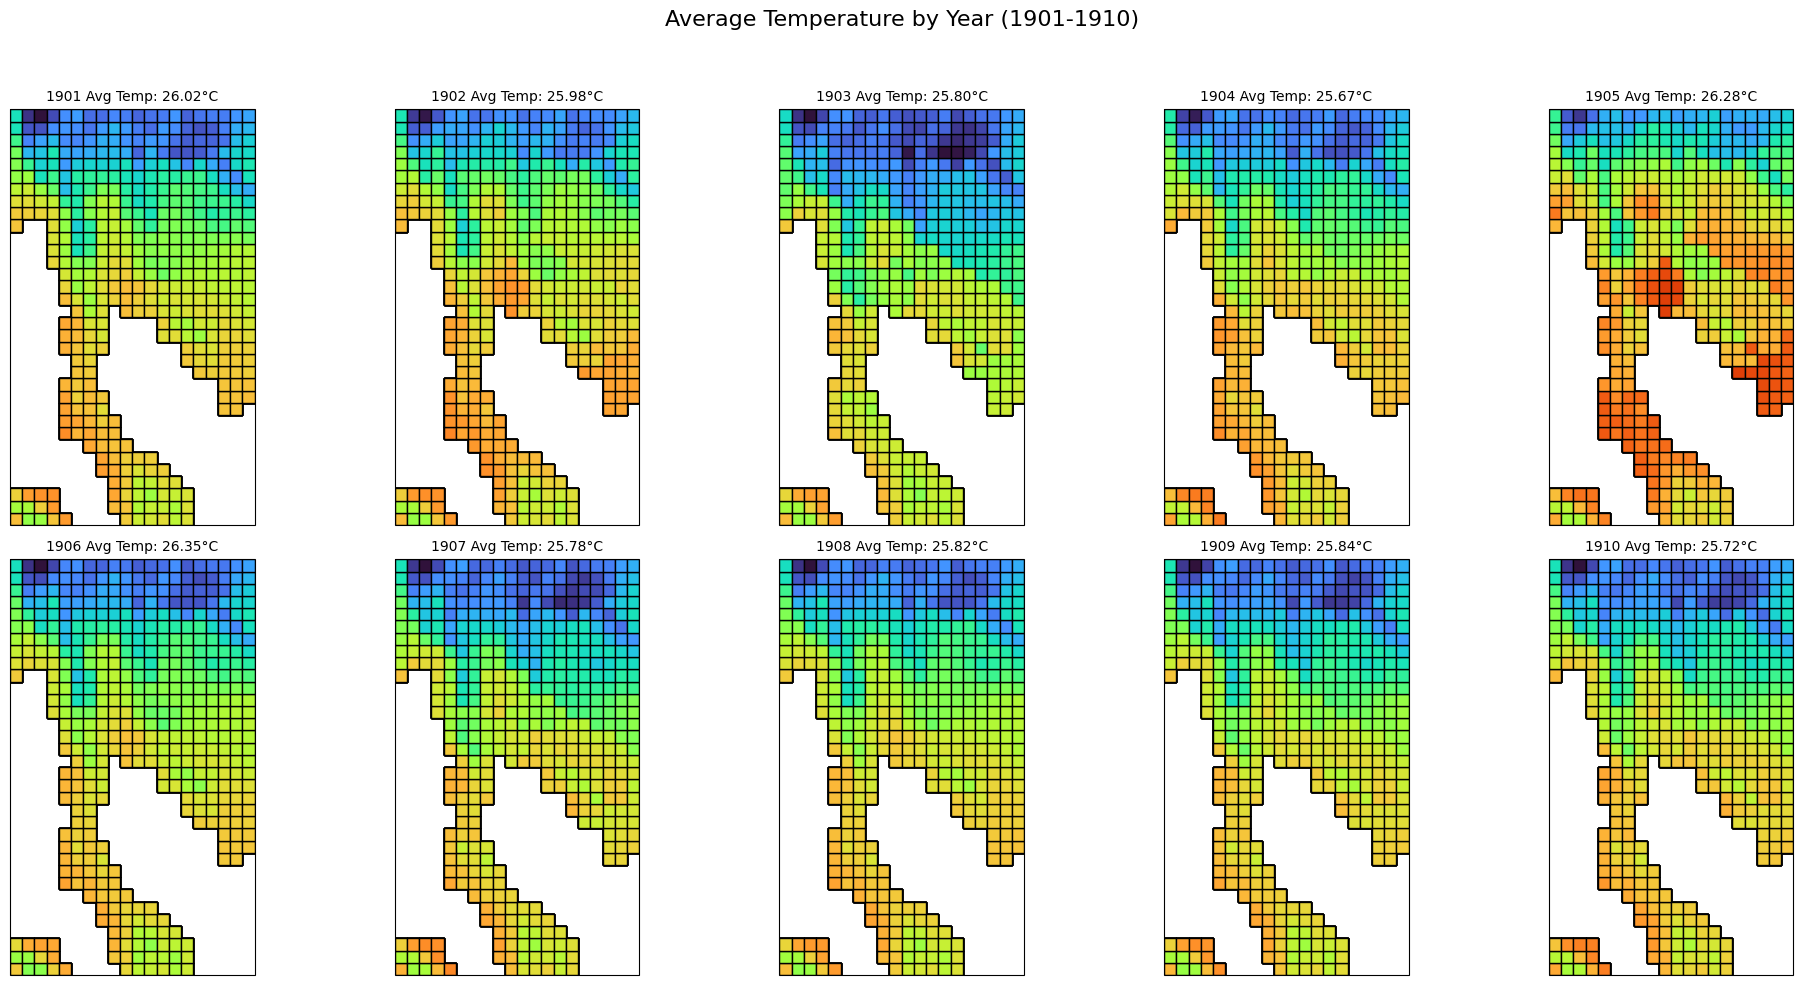

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import json
import numpy as np

# กำหนดปีที่ต้องการพล็อต
years = range(1901, 1911)  # ช่วงปี 1901-1910

# ขอบเขตแผนที่
lon_min, lon_max = 96, 106
lat_min, lat_max = 4, 21

# Color map
cmap = 'turbo'

# สร้าง subplot สำหรับ 10 ปี
fig, axes = plt.subplots(2, 5, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle("Average Temperature by Year (1901-1910)", fontsize=16)

for i, year in enumerate(years):
    # โหลดข้อมูล GeoJSON ของแต่ละปี
    geojson_file = f"../Geo-data/Year-Dataset/data_grid_{year}.json"
    with open(geojson_file, 'r', encoding='utf-8') as f:
        geojson_data = json.load(f)

    # แปลงข้อมูล GeoJSON เป็น GeoDataFrame
    gdf = gpd.GeoDataFrame.from_features(geojson_data['features'])

    # ตรวจสอบว่าข้อมูลมีคอลัมน์ temperature
    if 'temperature' not in gdf.columns:
        raise ValueError("GeoJSON data must contain 'temperature' property.")

    # คำนวณค่าเฉลี่ยรายปี
    annual_avg_temp = gdf['temperature'].mean()
    print(f"Year {year}: Average Temperature = {annual_avg_temp:.2f}°C")

    # แสดง grid cells เฉลี่ยของปีนั้น
    ax = axes[i // 5, i % 5]
    gdf.plot(column='temperature', ax=ax, cmap=cmap, edgecolor='k', legend=False)

    # ตั้งค่าแผนที่
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax.set_title(f"{year} Avg Temp: {annual_avg_temp:.2f}°C", fontsize=10)

# ปรับระยะห่างของ subplot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




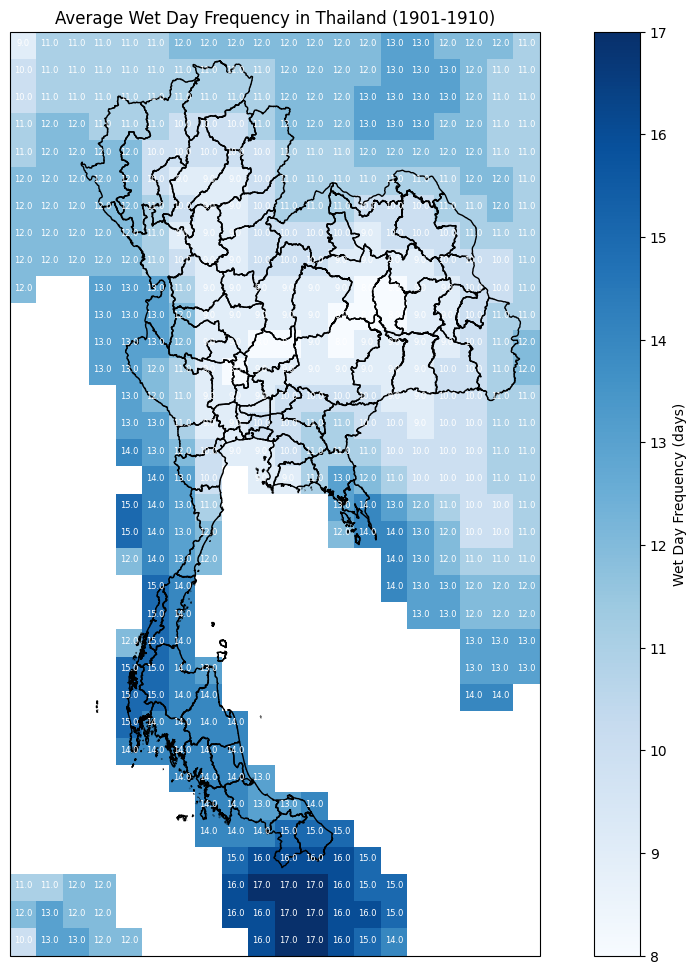

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd

# เปิดไฟล์ NetCDF
ds = xr.open_dataset("../dataset-nc/cru_ts4.08.1901.1910.wet.dat.nc")

# กรองข้อมูลให้เลือกช่วงเวลาที่ต้องการ (เช่น ปี 1901-1910)
data_avg = ds['wet'].mean(dim='time').dt.days

# กรองข้อมูลในพิกัดที่ต้องการ (ประเทศไทย)
data_filtered = ds.sel(lon=slice(96, 106), lat=slice(4, 21))

# คำนวณค่าเฉลี่ยของข้อมูลที่กรอง
data_avg_filtered = data_filtered['wet'].mean(dim='time').dt.days

# สร้างกราฟแผนที่
fig, ax = plt.subplots(figsize=(14, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# วาดขอบเขตของประเทศไทย
gdf = gpd.read_file("../Geo-data/shapefile-lv1-thailand.json")
gdf.geometry.boundary.plot(ax=ax, color='black', linewidth=1)  # ความหนาของเส้น boundary

# สร้างแผนที่แสดงข้อมูล
c = ax.pcolormesh(data_filtered['lon'], data_filtered['lat'], data_avg_filtered, cmap='Blues', transform=ccrs.PlateCarree())

# เพิ่มแถบสี (color bar)
plt.colorbar(c, ax=ax, label='Wet Day Frequency (days)')

# แสดงค่าของ wet ในแต่ละ grid
for i in range(data_avg_filtered.shape[0]):
    for j in range(data_avg_filtered.shape[1]):
        # กำหนดพิกัด lat และ lon สำหรับการแสดงข้อความ
        lon = data_filtered['lon'][j].values
        lat = data_filtered['lat'][i].values
        value = data_avg_filtered[i, j].values
        
        # เพิ่มข้อความที่พิกัด (lon, lat) บนแผนที่
        ax.text(lon, lat, f'{value:.1f}', fontsize=6, ha='center', color='white')

# ตั้งชื่อกราฟ
plt.title("Average Wet Day Frequency in Thailand (1901-1910)")

# แสดงผล
plt.show()


